# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#build query url
url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="
count = 0

# open new file for data
with open("output_data/weather_data.csv", "w") as weather_data:
    weather_writer = csv.writer(weather_data, delimiter=",")
    weather_writer.writerow(["City", "Lat", "Lng", "Max Temp", \
                            "Humidity", "Cloudiness", "Wind Speed", \
                            "Country", "Date"])
    print("Beginning Data Retrieval")
    print("-----------------------------------")
    
    # loop for api requests
    for city1 in cities:
        query_url= url + city1
        weather_json=requests.get(query_url).json()
        try:
            lat = weather_json["coord"]["lat"]
            lng = weather_json["coord"]["lon"]
            max_temp = round(weather_json["main"]["temp_max"] * 9 / 5 - 459.67, 2)
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"]
            country = weather_json["sys"]["country"]
            date = weather_json["dt"]
        except KeyError:
            print("City not found. Skipping...")
            continue 
        weather_writer.writerow([city1, lat, lng, max_temp, humidity, \
                            cloudiness, wind_speed, country, date])
        count += 1
        print(f"Processing Record {count} | {city1}")
    print("-----------------------------------")
    print("Data Retrieval Complete")
    print("-----------------------------------")


Beginning Data Retrieval
-----------------------------------
Processing Record 1 | rikitea
Processing Record 2 | barrow
Processing Record 3 | georgetown
Processing Record 4 | atuona
Processing Record 5 | cape town
Processing Record 6 | turmero
Processing Record 7 | longyearbyen
Processing Record 8 | nikolskoye
City not found. Skipping...
Processing Record 9 | pisco
City not found. Skipping...
Processing Record 10 | saint-philippe
Processing Record 11 | riachao das neves
Processing Record 12 | monrovia
Processing Record 13 | komsomolskiy
Processing Record 14 | jiangyou
Processing Record 15 | busselton
Processing Record 16 | mataura
Processing Record 17 | jamestown
Processing Record 18 | bago
Processing Record 19 | iqaluit
Processing Record 20 | chuy
Processing Record 21 | ushuaia
Processing Record 22 | sabha
Processing Record 23 | mahebourg
Processing Record 24 | verkhnyaya toyma
City not found. Skipping...
Processing Record 25 | east london
Processing Record 26 | vaini
Processing Recor

Processing Record 230 | mehamn
Processing Record 231 | syracuse
Processing Record 232 | manta
Processing Record 233 | manicore
Processing Record 234 | hilo
Processing Record 235 | fukue
Processing Record 236 | ixtapa
Processing Record 237 | flin flon
Processing Record 238 | trelew
Processing Record 239 | namibe
Processing Record 240 | sao joao da barra
Processing Record 241 | lavrentiya
Processing Record 242 | fortuna
Processing Record 243 | leeuwarden
Processing Record 244 | half moon bay
Processing Record 245 | codrington
Processing Record 246 | carupano
Processing Record 247 | tiksi
Processing Record 248 | gawler
Processing Record 249 | torbay
Processing Record 250 | balurghat
Processing Record 251 | tiznit
Processing Record 252 | chabahar
Processing Record 253 | bengkulu
Processing Record 254 | itaobim
Processing Record 255 | reforma
Processing Record 256 | bay roberts
Processing Record 257 | guaruja
Processing Record 258 | taltal
Processing Record 259 | lagdo
Processing Record 260

Processing Record 459 | chifeng
Processing Record 460 | yar-sale
Processing Record 461 | yinchuan
Processing Record 462 | kirakira
Processing Record 463 | axim
City not found. Skipping...
Processing Record 464 | hwange
Processing Record 465 | harper
Processing Record 466 | maralal
Processing Record 467 | salinas
Processing Record 468 | lar
Processing Record 469 | rawson
Processing Record 470 | akyab
Processing Record 471 | teahupoo
Processing Record 472 | wencheng
Processing Record 473 | frontera
Processing Record 474 | cardston
Processing Record 475 | curup
Processing Record 476 | deputatskiy
Processing Record 477 | egvekinot
City not found. Skipping...
Processing Record 478 | hirara
Processing Record 479 | lukovetskiy
City not found. Skipping...
City not found. Skipping...
Processing Record 480 | lagoa
Processing Record 481 | zhengjiatun
Processing Record 482 | dharapuram
Processing Record 483 | tazovskiy
Processing Record 484 | laguna
Processing Record 485 | hukuntsi
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Import csv to a dataframe and then check column counts. 
city_data = pd.read_csv("output_data/weather_data.csv")
city_data.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       553
Date          557
dtype: int64

In [5]:
# Display the dataframe
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,68.20,59,87,5.78,PF,1595261379
1,barrow,71.29,-156.79,35.60,96,90,3.60,US,1595261728
2,georgetown,5.41,100.34,78.80,88,40,1.00,MY,1595261381
3,atuona,-9.80,-139.03,79.59,77,17,7.77,PF,1595261728
4,cape town,-33.93,18.42,66.20,55,0,2.60,ZA,1595261274


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
city_data["Humidity"].max()

100

In [7]:
#  Get the indices of cities that have humidity over 100%.
index = city_data[city_data["Humidity"] > 100].index.tolist()
print(index)

[]


In [8]:
# calculate outliers for Humidity
humidity_series = city_data["Humidity"]
quartiles = humidity_series.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Humidity values below {round(lower_bound, 2)} and above \
{round(upper_bound, 2)} could be outliers.")

Humidity values below 13.0 and above 125.0 could be outliers.


In [9]:
# Get the indices of cities that have humidity lower than the lower_bound. 
# All test runs on data have not included any humidity above upper_bound. 
index_outliers = city_data[city_data["Humidity"] < lower_bound].index.tolist()
print(index_outliers)

[26, 78, 305, 323, 335, 360, 438, 530]


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
# which we call "clean_city_data".
clean_city_data = city_data.drop(index_outliers)
clean_city_data.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       547
Date          549
dtype: int64

In [11]:
# Extract relevant fields from the data frame
final_city_data = clean_city_data[["City", "Lat", "Lng", "Max Temp", \
                                   "Humidity", "Cloudiness", "Wind Speed", "Country"]]

# Export the City_Data into a csv
final_city_data.to_csv(output_data_file, index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

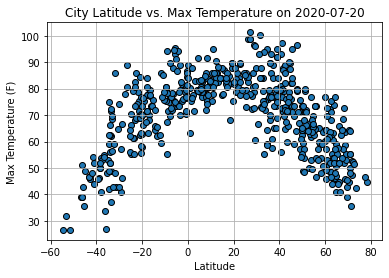

In [12]:
from datetime import date
today = date.today()

latitude = final_city_data["Lat"]
maximum_temperature = final_city_data["Max Temp"]

plt.scatter(latitude, maximum_temperature, edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature on {today}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

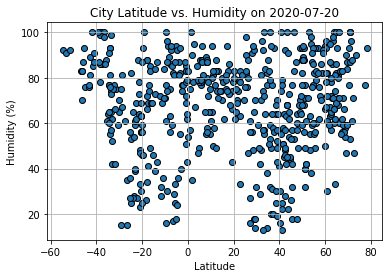

In [13]:
humidity1 = final_city_data["Humidity"]

plt.scatter(latitude, humidity1, edgecolors="black")
plt.title(f"City Latitude vs. Humidity on {today}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

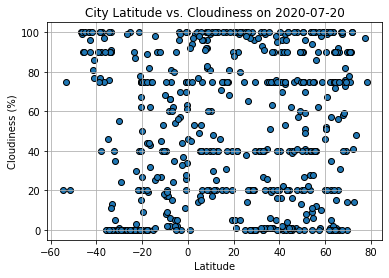

In [14]:
cloudiness1 = final_city_data["Cloudiness"]

plt.scatter(latitude, cloudiness1, edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness on {today}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

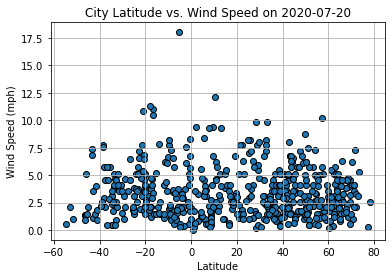

In [15]:
wind_speed1 = final_city_data["Wind Speed"]

plt.scatter(latitude, wind_speed1, edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed on {today}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern = final_city_data[final_city_data["Lat"] >= 0]
southern = final_city_data[final_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.49945170269397154


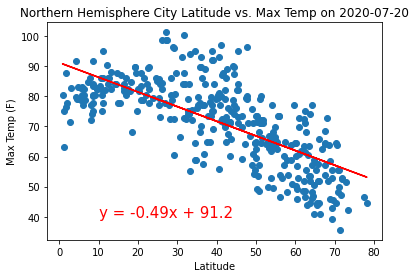

In [18]:
n_lat = northern["Lat"]
n_max_temp = northern["Max Temp"]
x_values = n_lat
y_values = n_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig5.png")
plt.show()

In the northern hemisphere, maximum temperature and latitude are negatively correlated. As latitude goes up, moving farther away from the equator, maximum temperature goes down. The closer you are to the equator, the warmer the weather is. The relationship is fairly robust, the r-squared was 0.49 in my run of the data. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6320787945552362


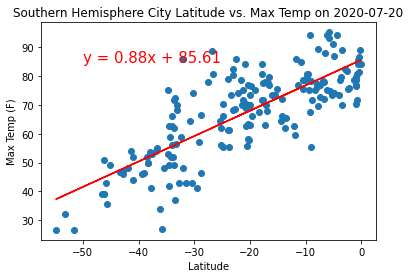

In [19]:
s_lat = southern["Lat"]
s_max_temp = southern["Max Temp"]
x_values = s_lat
y_values = s_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,85),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Max Temp on {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("output_data/Fig6.png")
plt.show()

In the southern hemisphere, maximum temperature and latitude are positively correlated. As latitude goes up, moving closer to the equator, maximum temperature goes up. The closer you are to the equator, the warmer the weather is. The relationship is very robust, the r-squared was 0.70 in my run of the data. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00040838062211018484


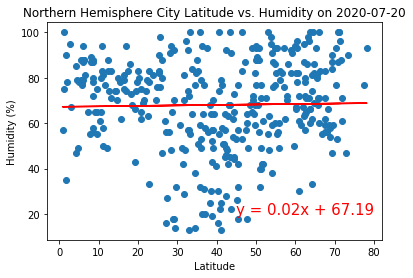

In [20]:
n_humidity = northern["Humidity"]
x_values = n_lat
y_values = n_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig7.png")
plt.show()

In the northern hemisphere, latitude and humidity are not correlated. In my run of the data, the r-squared was 0.0001. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.047724449554432995


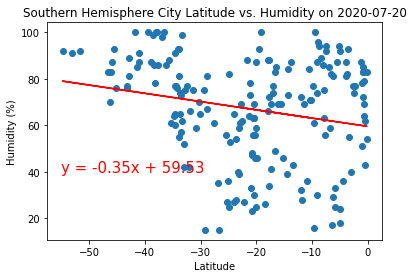

In [21]:
s_humidity = southern["Humidity"]
x_values = s_lat
y_values = s_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Humidity on {today}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/Fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0008706369989890541


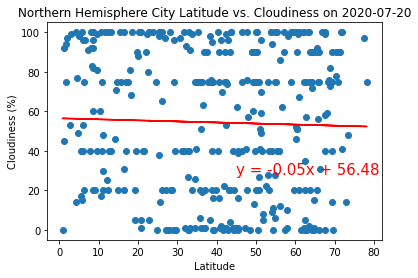

In [22]:
n_cloudiness = northern["Cloudiness"]
x_values = n_lat
y_values = n_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.025453610561981012


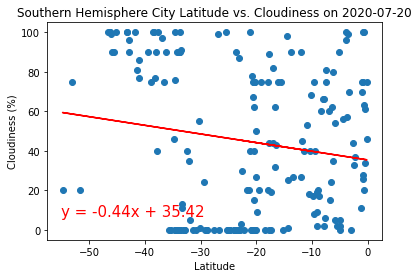

In [23]:
s_cloudiness = southern["Cloudiness"]
x_values = s_lat
y_values = s_cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,7),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Cloudiness on {today}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002648558830860857


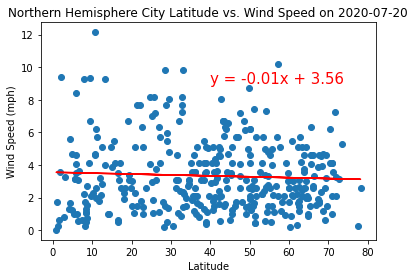

In [24]:
n_wind_speed = northern["Wind Speed"]
x_values = n_lat
y_values = n_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,9),fontsize=15,color="red")
plt.title(f"Northern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008054831959959693


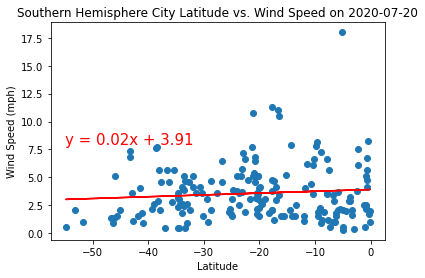

In [25]:
s_wind_speed = southern["Wind Speed"]
x_values = s_lat
y_values = s_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,8),fontsize=15,color="red")
plt.title(f"Southern Hemisphere City Latitude vs. Wind Speed on {today}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/Fig12.png")
plt.show()